# 🛠 Exercises


###1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.

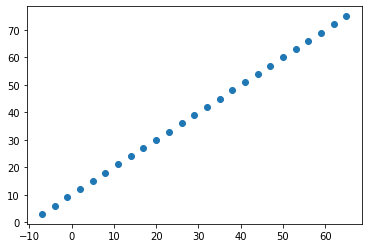

In [1]:
# Making a Bigger Dataset

import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0,17.0,20.0,23.0,26.0,29.0,32.0,35.0,38.0,41.0,44.0,47.0,50.0,53.0,56.0,59.0,62.0,65.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0,27.0,30.0,33.0,36.0,39.0,42.0,45.0,48.0,51.0,54.0,57.0,60.0,63.0,66.0,69.0,72.0,75.0])

# Visualize it
plt.scatter(X, y);

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

Bigger_model = tf.keras.Sequential([
               tf.keras.layers.Dense(1)                     
])

Bigger_model.compile(loss=tf.keras.losses.mae,optimizer = tf.keras.optimizers.SGD(),metrics=["mae"])
Bigger_model.fit(X,y,epochs =100)

In [4]:
Bigger_model.predict([68.0])

array([[78.47369]], dtype=float32)

###2.Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?

In [ ]:
tf.random.set_seed(42)

Dense_4_Layer_Model = tf.keras.Sequential([
                      tf.keras.layers.Dense(10),
                      tf.keras.layers.Dense(20),
                      tf.keras.layers.Dense(30),
                      tf.keras.layers.Dense(1)                     
])

Dense_4_Layer_Model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])
Dense_4_Layer_Model.fit(X,y,epochs=100,verbose =2)

###3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
a) Building a larger model (how does one with 4 dense layers go?)

b) Increasing the number of units in each layer.

c) Lookup the documentation of Adam and find out what the first parameter is, what happens if you increase it by 10x?

d) What happens if you train for longer (say 300 epochs instead of 200)?

In [7]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [8]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ct = make_column_transformer((MinMaxScaler(),["age","bmi","children"]),
                             (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"]))

In [15]:
X = insurance.drop("charges",axis=1)
y = insurance["charges"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.10,random_state=42)
len(X),len(X_train),len(X_test)

(1338, 1204, 134)

In [ ]:
ct.fit(X_train)

In [17]:
X_train_Normalized = ct.transform(X_train)
X_test_Normalized = ct.transform(X_test)

In [ ]:
tf.random.set_seed(42)

normalized_model = tf.keras.Sequential([
                   tf.keras.layers.Dense(80,activation='relu'),
                   tf.keras.layers.Dense(100,activation='relu'),
                   tf.keras.layers.Dense(100,activation='relu'),
                   tf.keras.layers.Dense(1)                     
])
normalized_model.compile(loss=tf.keras.losses.mae,optimizer = tf.keras.optimizers.SGD(),metrics=["mae"])
normalized_model.fit(X_train_Normalized,y_train,epochs =100)

In [ ]:
tf.random.set_seed(42)

normalized_model_2_Adam = tf.keras.Sequential([
                                               tf.keras.layers.Dense(100),
                                               tf.keras.layers.Dense(100),
                                               tf.keras.layers.Dense(100),
                                               tf.keras.layers.Dense(1)
])
normalized_model_2_Adam.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(lr=0.001),metrics=["mae"])
normalized_model_2_Adam.fit(X_train_Normalized,y_train,epochs = 200)

In [ ]:
tf.random.set_seed(42)

normalized_model_2_Adam = tf.keras.Sequential([
                                               tf.keras.layers.Dense(100),
                                               tf.keras.layers.Dense(100),
                                               tf.keras.layers.Dense(100),
                                               tf.keras.layers.Dense(1)
])
normalized_model_2_Adam.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(lr=0.01),metrics=["mae"])
normalized_model_2_Adam.fit(X_train_Normalized,y_train,epochs = 300)

###4. Import the Boston pricing dataset from TensorFlow tf.keras.datasets and model it.

In [29]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)

In [30]:
len(x_train),len(x_test)

(404, 102)

In [32]:
y_train

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [ ]:
tf.random.set_seed(42)

House_Prediction_Model = tf.keras.Sequential([
                                              tf.keras.layers.Dense(100,activation='relu'),
                                              tf.keras.layers.Dense(100,activation='relu'),
                                              tf.keras.layers.Dense(1)
])
House_Prediction_Model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(0.01),metrics=["mae"])
House_Prediction_Model.fit(x_train,y_train,epochs=200)

# 📖 Extra curriculum

To practice your regression modelling with TensorFlow, I'd also encourage you to look through [Lion Bridge's collection of datasets](https://lionbridge.ai/datasets/) or [Kaggle's datasets](https://www.kaggle.com/data), find a regression dataset which sparks your interest and try to model.

https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes?select=vw.csv

In [37]:
from google.colab import files
data = files.upload()

Saving vw.csv to vw (1).csv


In [38]:
Car_Data = pd.read_csv("/content/vw.csv")

In [39]:
Car_Data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5


In [59]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

X = Car_Data.drop("price",axis=1)
y = Car_Data["price"]

ct = make_column_transformer((MinMaxScaler(),["mileage","tax","mpg","engineSize","year"]),
                             (OneHotEncoder(handle_unknown="ignore"),["model","transmission","fuelType"]))

X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(X,y,test_size=0.15,random_state=42)

ct.fit(X_train_1)
X_train_Car_Normalized = ct.transform(X_train_1)
X_test_Car_Normalized = ct.transform(X_test_1)
X_train_Car_Normalized

<12883x39 sparse matrix of type '<class 'numpy.float64'>'
	with 102542 stored elements in Compressed Sparse Row format>

In [60]:
X_train_Car_Normalized.shape , X_train_1.shape

((12883, 39), (12883, 8))

In [56]:
len(X_train),len(X_test),len(X)

(12883, 2274, 15157)

In [ ]:
tf.random.set_seed

car_model_Normalized = tf.keras.Sequential([
                            tf.keras.layers.Dense(20,activation='relu'),
                            tf.keras.layers.Dense(80,activation='relu'),
                            tf.keras.layers.Dense(1)                     
])
car_model_Normalized.compile(loss = tf.keras.losses.mae,optimizer = tf.keras.optimizers.Adam(lr=0.1),metrics=["mae"])
car_model_Normalized.fit(X_train_Car_Normalized,y_train_1,epochs = 200)